<a href="https://colab.research.google.com/github/nuraishasb/supervisedML/blob/main/Python_SupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 | Introduction

In this report, we experiment the use of machine learning operators, mainly Supervised Learning. We will be working with Regression models using the Insurance dataset, and Classification models on the Stroke dataset.

### 1.1: EDA

We use exploratory data analysis (EDA) to investigate data sets and summarize their main characteristics, which can be done by employing data visualization methods.

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

import pandas as pd
df = pd.read_csv('/content/drive/My Drive/insurance.csv')

Mounted at /content/drive


In [2]:
# checking for duplicates
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

# checking for NA values
df.dropna(inplace=True)
print(df.isna().sum())

df.head(n=5)

0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2 | Regression Task


In [3]:
# Data visulisation

import numpy as np # work with arrays
import scipy.stats as stats # for statistical procedures such as t-test etc.
import seaborn as sns # data visualisation library
import matplotlib.pyplot as plt

#libraries used for handling missing and non-numeric values - part of data cleaning
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#Pipeline : Chains all steps of the workflow for a more streamlined procedure.
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


#Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,chi2

#Training data
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets.
from sklearn.model_selection import cross_val_score # Evaluate a score by cross-validation.
from sklearn.model_selection import StratifiedShuffleSplit #Random permutation cross-validator
from sklearn.model_selection import GridSearchCV # Exhaustive search over specified parameter values for an estimator

#linear regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
#Decision tree and SVM
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC

#R2 square and mean squared error
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error

#KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Logistic Regression
from sklearn.linear_model import LogisticRegression

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

#SVM
from sklearn.svm import SVC

In [4]:
# covert categorical to numerical values using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
ordinal_encoder = OrdinalEncoder()
sex = df['sex'].values.reshape(-1,1) #female = 0, male = 1.
df['sex'] = ordinal_encoder.fit_transform(sex)

smoker = df['smoker'].values.reshape(-1,1) #smoker = 1, non-smoker = 0.
df['smoker'] = ordinal_encoder.fit_transform(smoker)

region = df['region'].values.reshape(-1,1) #NE = 0, NW = 1, SE = 2, SW = 3.
df['region'] = ordinal_encoder.fit_transform(region)

df.head(n=5)

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


### 2.1: Predicting Cost of Insurance

In [5]:
# feature selection - split the data into features and targets. We want the target/dependent variable to be 'charges'.
target = df['charges']
features = df.loc[:, df.columns != 'charges']

selected_features = []
selector = SelectKBest(f_regression, k = 'all')
selector.fit_transform(features, target)

supports = selector.get_support()

print(supports)
print(features.columns)

for support, feature in zip(supports, features.columns):

  if (support == True):
    selected_features.append(feature)

print('Selected features are: ', selected_features)

# split the feature and target into train and test
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.3, random_state = 13)

[ True  True  True  True  True  True]
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')
Selected features are:  ['age', 'sex', 'bmi', 'children', 'smoker', 'region']


In [10]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


#### 2.1.1: Linear Regression

Linear regression model is a basic and commonly used type of predictive analysis - it assumes a linear relationship between the independent variable and the dependent variable, and aims to find the best-fitting line that describes the relationship.

R2 score of the regression model is:  0.7689060049835603
RMSE score of the regression model is:  5700.7962411597355


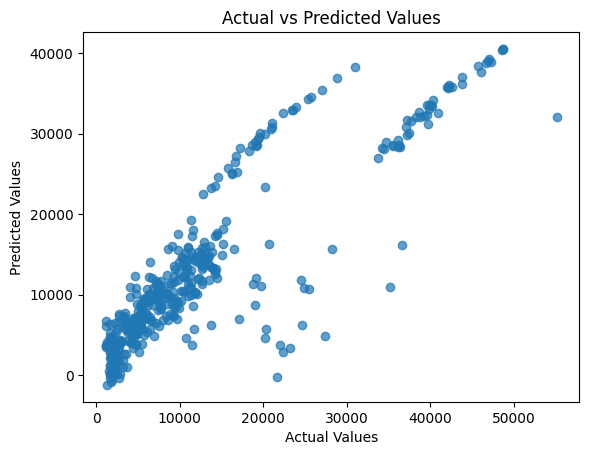

In [6]:
# simple linear regression
model = LinearRegression()
model.fit(X_train, Y_train)

predictions = model.predict(X_test)

# R squared score measures the proportion of the variance in the dependent variable that is predictable from the independent variables
# higher value the better
r2_lr = r2_score(Y_test, predictions)

# square root of the avg squared differences b/w predicted and act values
# smaller value the better
mse_lr = mean_squared_error(Y_test, predictions)
rmse_lr = np.sqrt(mse_lr)

print('R2 score of the regression model is: ', r2_lr)
print('RMSE score of the regression model is: ', rmse_lr)

#does not take into account multicollinearity

plt.scatter(Y_test, predictions, alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

#### 2.1.2: Ridge Regression

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. We’ll use the `glmnet()` function to fit the ridge regression model and specify `alpha=0`.

In [7]:
# ridge regression
model = Ridge(alpha = 0.5)
model.fit(X_train, Y_train)

predictions = model.predict(X_test)
r2_rr = r2_score(Y_test, predictions)
mse_rr = mean_squared_error(Y_test, predictions)
rmse_rr = np.sqrt(mse_rr)

print('R2 score of the regression model is: ', r2_rr)
print('RMSE score of the regression model is: ', rmse_rr)

R2 score of the regression model is:  0.7687782317685751
RMSE score of the regression model is:  5702.372025087136


####2.1.3: Lasso Regression

Lasso regression is another model tuning method, similar to ridge, that is used to analyse data with multicollinearity present. We’ll use the `glmnet()` function as well to fit the lasso regression model but specify `alpha=1` instead.

In [8]:
# lasso regression
model = Lasso(alpha = 0.5)
model.fit(X_train, Y_train)

predictions = model.predict(X_test)
r2_la = r2_score(Y_test, predictions)
mse_la = mean_squared_error(Y_test, predictions)
rmse_la = np.sqrt(mse_la)

print('R2 score of the regression model is: ', r2_la)
print('RMSE score of the regression model is: ', rmse_la)

R2 score of the regression model is:  0.7688981292617012
RMSE score of the regression model is:  5700.893382375029


### 2.2: Final Analyisis

In [9]:
# creating a report
models = pd.DataFrame({
    'Model': ['Simple Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'R2 Score': [r2_lr, r2_rr, r2_la],
    'RMSE Score': [rmse_lr, rmse_rr, rmse_la]})
models

,Model,R2 Score,RMSE Score
0,Simple Linear Regression,0.768906,5700.796241
1,Ridge Regression,0.768778,5702.372025
2,Lasso Regression,0.768898,5700.893382


# 3 | Classification Task


### 3.1: predicting heart disease diagnosis

In [14]:
df1 = pd.read_csv('/content/drive/My Drive/stroke-data.csv')

In [15]:
# checking for duplicates
df1.drop_duplicates(inplace=True)
print(df1.duplicated().sum())

# checking for NA values
df1.dropna(inplace=True)
print(df1.isna().sum())

df1.drop(df1.columns[[0]],
              axis=1, inplace=True)

df1.head(n=5)

0
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [18]:
# covert categorical to numerical values using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
ordinal_encoder = OrdinalEncoder()
gender = df1['gender'].values.reshape(-1,1)
df1['gender'] = ordinal_encoder.fit_transform(gender)

ever_married = df1['ever_married'].values.reshape(-1,1)
df1['ever_married'] = ordinal_encoder.fit_transform(ever_married)

work_type = df1['work_type'].values.reshape(-1,1)
df1['work_type'] = ordinal_encoder.fit_transform(work_type)

Residence_type = df1['Residence_type'].values.reshape(-1,1)
df1['Residence_type'] = ordinal_encoder.fit_transform(Residence_type)

smoking_status = df1['smoking_status'].values.reshape(-1,1)
df1['smoking_status'] = ordinal_encoder.fit_transform(smoking_status)

df1.head(n=5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.6,1.0,1
2,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.5,2.0,1
3,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.4,3.0,1
4,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.0,2.0,1
5,1.0,81.0,0,0,1.0,2.0,1.0,186.21,29.0,1.0,1


In [19]:
# This time let “smokers” be the target, the rest as the features

target = df1['heart_disease']
features = df1.loc[:, df1.columns != 'heart_disease']

selected_features = []
selector = SelectKBest(f_regression, k = 'all')
selector.fit_transform(features, target)

supports = selector.get_support()

print(supports)
print(features.columns)

for support, feature in zip(supports, features.columns):

  if (support == True):
    selected_features.append(feature)

print('Selected features are: ', selected_features)

[ True  True  True  True  True  True  True  True  True  True]
Index(['gender', 'age', 'hypertension', 'ever_married', 'work_type',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke'],
      dtype='object')
Selected features are:  ['gender', 'age', 'hypertension', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.3, random_state = 31)

In [21]:
# Classify the “smokers” using: (1) K Nearest Neighbour

KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train, Y_train)

Y_pred = KNN.predict(X_test)

accuracy_KNN = round(metrics.accuracy_score(Y_test, Y_pred)*100, 2)
print('Accuracy of KNN is ', accuracy_KNN)

Accuracy of KNN is  95.04


In [22]:
# (2) Logistic Regression

LR = LogisticRegression()
LR.fit(X_train, Y_train)

Y_pred = LR.predict(X_test)

accuracy_LR = round(metrics.accuracy_score(Y_test, Y_pred)*100, 2)
print('Accuracy of LR is ', accuracy_LR)

Accuracy of LR is  95.04


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
# (3) Decision Tree Classifier

DTC = DecisionTreeClassifier()

DTC.fit(X_train, Y_train)

Y_pred = DTC.predict(X_test)

accuracy_DTC = round(metrics.accuracy_score(Y_test, Y_pred)*100, 2)
print('Accuracy of DTC is ', accuracy_DTC)

Accuracy of DTC is  91.38


In [24]:
# (4) Support Vector Machine

SVC = SVC()

SVC.fit(X_train, Y_train)

Y_pred = SVC.predict(X_test)

accuracy_SVC = round(metrics.accuracy_score(Y_test, Y_pred)*100, 2)
print('Accuracy of SVC is ', accuracy_SVC)

Accuracy of SVC is  95.04


In [25]:
# (5) Naive Bayes Classifier

Gaussian = GaussianNB()

Gaussian.fit(X_train, Y_train)

Y_pred = Gaussian.predict(X_test)

accuracy_Gaussian = round(metrics.accuracy_score(Y_test, Y_pred)*100, 2)
print('Accuracy of Gaussian is ', accuracy_Gaussian)

Accuracy of Gaussian is  87.85


In [26]:
# Produce a report for Step 5, sorting the accuracy values in descending order

models = pd.DataFrame({
    'Model':['KNN', 'Naive Bayes', 'Logistic Regression','Decision Tree Classifier', 'Support Vector Machines'],
    'Score':[accuracy_KNN, accuracy_Gaussian, accuracy_LR, accuracy_DTC, accuracy_SVC]
})

models

,Model,Score
0,KNN,95.04
1,Naive Bayes,87.85
2,Logistic Regression,95.04
3,Decision Tree Classifier,91.38
4,Support Vector Machines,95.04
